## Final Project Submission

Please fill out:
* Student name: Raffette Alston
* Student pace: Part-time
* Scheduled project review date/time: 
* Instructor name: James Irving, PhD
* Blog post URL:


# Introduction
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating. 


### Questions to Ask
- Which movie genres grossed the most domestically and internationally between 2010-present?
- Which genres are most popular between 2010-present?
- Which studios produced the movies with the highest gross between 2010-present?
- What was the production budget for the top grossing movies from 2010-present?



# Import Libraries and Data

In [6]:
%ls

CONTRIBUTING.md             module1_project_rubric.pdf
LICENSE.md                  output_37_0.png
README.md                   student.ipynb
Untitled.ipynb              zippedData/
awesome.gif


In [7]:
import os
os.listdir("zippedData/")

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [8]:
import glob
file_list = glob.glob("zippedData/*")
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
DATA = {}
for file in file_list:
    key = file.split('/')[-1]
    print(key)
    
    try:
        df = pd.read_csv(file)
    except:
        df = pd.read_csv(file, sep='\t',encoding='latin-1')
    
    DATA[key] = df

imdb.title.crew.csv.gz
tmdb.movies.csv.gz
imdb.title.akas.csv.gz
imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz
rt.reviews.tsv.gz
imdb.title.basics.csv.gz
rt.movie_info.tsv.gz
tn.movie_budgets.csv.gz
bom.movie_gross.csv.gz
imdb.title.principals.csv.gz


In [11]:
for filename, df in DATA.items():
    print(filename)
    display(df.head())
    print()

imdb.title.crew.csv.gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



tmdb.movies.csv.gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



imdb.title.akas.csv.gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



imdb.title.ratings.csv.gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



imdb.name.basics.csv.gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



rt.reviews.tsv.gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



imdb.title.basics.csv.gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



rt.movie_info.tsv.gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



tn.movie_budgets.csv.gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



bom.movie_gross.csv.gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



imdb.title.principals.csv.gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Explore Data

In [12]:
df0 = pd.read_csv(file_list[0])
df0.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [13]:
df1 = pd.read_csv(file_list[1])
df1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
df2 = pd.read_csv(file_list[2])
df2.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [15]:
df3 = pd.read_csv(file_list[3])
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
df4 = pd.read_csv(file_list[4])
df4.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [17]:
df6 = pd.read_csv(file_list[6])
df6.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
df8 = pd.read_csv(file_list[8])
df8.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
df9 = pd.read_csv(file_list[9])
df9.sort_values(by='domestic_gross', ascending=[False])
df9

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [20]:
df10 = pd.read_csv(file_list[10])
df10.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [21]:
df11 = pd.read_csv('/Users/raffette/datasets_95290_221883_blockbusters.csv')
df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


### Notes & Observations
- Look at the ones from the same site for possible combinations
- imdb.title.crew.csv.gz = 0
    - Index column = tconst
    - tconst
    - directors
    - writers
- tmdb.movies.csv.gz = 1
    - Index column = id
    - original_title/title
    - release_date
- imdb.title.akas.csv.gz = 2
    - Index column = tconst
    - title_id (-tconst)
    - region
- imdb.title.ratings.csv.gz = 3
    - Index column = tconst
    - Average ratings
- imdb.name.basics.csv.gz = 4
    - Index column = nconst
    - known_titles (in a list)
    - name (profession)
    - primary_profession 
- rt.reviews.tsv.gz = 5 
    - Index column = ?
    - Interesting columns
- imdb.title.basics.csv.gz = 6
    - Index column = ?
    - tconst
    - primary_title, original_title
    - start year
    - genre
- rt.movie_info.tsv.gz = 7 *
   - Index column =
   - Interesting columns
- tn.movie_budgets.csv.gz = 8
    - Index column = id
    - Release date
    - movie (title)
    - budget
    - domestic gross
    - worldwide gross
- bom.movie_gross.csv.gz = 9
    - Index column = ?
    - title
    - studio
    - domestic gross
    - foreign gross
    - year         
- imdb.title.principals.csv.gz = 10
    - Index column = tconst
    - category
    - job
    - characters
    
- blockbuster.csv
    - Multi-index
    - How do I use this?
    
    ### DataFrames I plan to use for this project:
    - imdb.name.basics.csv.gz = 4
    - imdb.title.basics.csv.gz = 6
    - tn.movie_budgets.csv.gz = 8
    - bom.movie_gross.csv.gz = 9
    - blockbuster.csv = 11
    

In [22]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# Data Cleaning

In [23]:
#split genres
genre_title_df = df6[['primary_title','genres']].copy()
genres = ','.join(df6['genres'].dropna())
unique_genres = list(set(genres.lower().split(',')))
def genre_cols(df, genres):
    for i in genres:
        df[f'is_{i}'] = df6['genres'].str.contains(f'{i}'.title())
    return df
genre_df = genre_cols(df, unique_genres)
genre_df = genre_df.dropna()
genre_df.transpose()


""
tconst
ordering
nconst
category
job
characters
is_family
is_animation
is_war
is_adult


In [20]:
#unique_genres = df6['genres'].nunique()
 
#print('Unique elements in column "Genres" : ')
#print(unique_genres)

In [24]:
df8['production_budget'] = df8['production_budget'].map(lambda row:row.replace("$","").replace(",",""))
df8['domestic_gross'] = df8['domestic_gross'].map(lambda row:row.replace("$","").replace(",",""))
df8['worldwide_gross'] = df8['worldwide_gross'].map(lambda row:row.replace("$","").replace(",",""))


In [25]:
currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for col in currency_cols:
    df8[col] = df8[col].astype(float)
    
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [26]:
df8.sort_values(by='worldwide_gross', ascending=[False])
df8.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Restricting dataset to 2010-on

In [27]:
df8['release_date'] = pd.to_datetime(df8['release_date'])
df8.set_index('release_date', inplace = True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 2009-12-18 to 2005-08-05
Data columns (total 5 columns):
id                   5782 non-null int64
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 271.0+ KB


In [28]:
df8 = df8.loc['2010':].sort_index().reset_index()
df8.head()

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross
0,2010-01-08,67,Daybreakers,20000000.0,30101577.0,51445503.0
1,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0
2,2010-01-08,13,Youth in Revolt,18000000.0,15285588.0,19685588.0
3,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0
4,2010-01-15,36,Fish Tank,3000000.0,374675.0,5922292.0


In [29]:
df6.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
#looking for length of each dataset
len(df8),len(df6)

(2194, 146144)

In [31]:
df_big = pd.merge(df8,df6, left_on = 'movie', right_on = 'original_title')
df_big.head()

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,tt1216492,Leap Year,Leap Year,2010,100.0,"Comedy,Romance"
1,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0,tt1037705,The Book of Eli,The Book of Eli,2010,118.0,"Action,Adventure,Drama"
2,2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,tt1273678,The Spy Next Door,The Spy Next Door,2010,94.0,"Action,Comedy,Family"
3,2010-01-15,25,The Last Station,18000000.0,6617867.0,15696146.0,tt2627798,The Last Station,The Last Station,2011,NaN,Drama
4,2010-01-22,23,Tooth Fairy,48000000.0,60022256.0,112610386.0,tt0808510,Tooth Fairy,Tooth Fairy,2010,101.0,"Comedy,Family,Fantasy"


In [32]:
#look for duplicates
df_big[df_big.duplicated(subset = ['tconst'])]

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
50,2013-10-25,100,The Square,1500000.0,124244.0,176262.0,tt4995790,The Square,The Square,2017,151.0,"Comedy,Drama"
51,2013-10-25,100,The Square,1500000.0,124244.0,176262.0,tt5511124,The Square,The Square,2016,75.0,Family
74,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama"
75,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama"
76,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller"
77,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN
78,2018-11-21,9,Robin Hood,99000000.0,30824628.0,84747441.0,tt8558276,Robin Hood,Robin Hood,2017,60.0,"Action,Adventure,History"
777,2013-02-22,26,Snitch,15000000.0,42930462.0,57907734.0,tt0882977,Snitch,Snitch,2013,112.0,"Action,Drama,Thriller"
793,2013-04-05,71,Trance,16000000.0,2322593.0,22594052.0,tt1111235,Trance,Trance,2010,83.0,Horror
794,2013-04-05,71,Trance,16000000.0,2322593.0,22594052.0,tt1924429,Trance,Trance,2013,101.0,"Crime,Drama,Mystery"


In [33]:
df_big.drop_duplicates(subset = 'id', keep = 'last')
df_big


,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,tt1216492,Leap Year,Leap Year,2010,100.0,"Comedy,Romance"
1,2010-01-15,64,The Book of Eli,80000000.0,94835059.0,158750817.0,tt1037705,The Book of Eli,The Book of Eli,2010,118.0,"Action,Adventure,Drama"
2,2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,tt1273678,The Spy Next Door,The Spy Next Door,2010,94.0,"Action,Comedy,Family"
3,2010-01-15,25,The Last Station,18000000.0,6617867.0,15696146.0,tt2627798,The Last Station,The Last Station,2011,NaN,Drama
4,2010-01-22,23,Tooth Fairy,48000000.0,60022256.0,112610386.0,tt0808510,Tooth Fairy,Tooth Fairy,2010,101.0,"Comedy,Family,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2019-12-31,16,Eli,11000000.0,0.0,0.0,tt4786638,Eli,Eli,2015,154.0,Comedy
2507,2019-12-31,16,Eli,11000000.0,0.0,0.0,tt5294518,Eli,Eli,2019,NaN,Horror
2508,2019-12-31,30,Reagan,25000000.0,0.0,0.0,tt1822382,Reagan,Reagan,2011,105.0,"Biography,Documentary"
2509,2019-12-31,13,Rogue City,13000000.0,0.0,0.0,tt10329540,Rogue City,Rogue City,2020,NaN,NaN


In [58]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Data Visualization

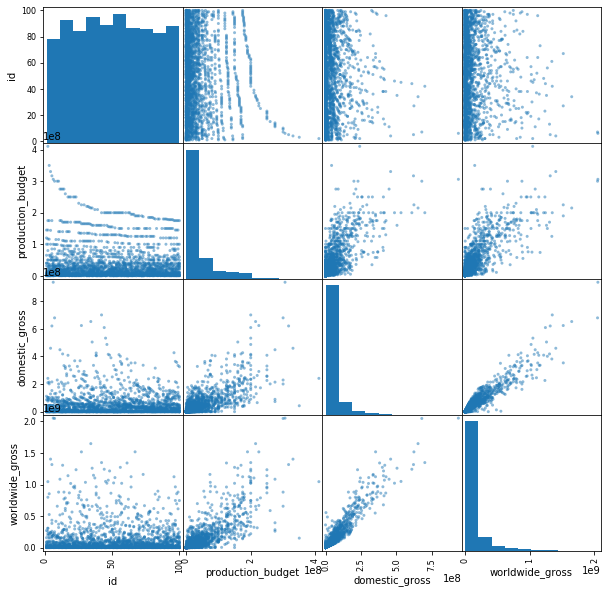

In [34]:
#look at the correlation between domestic gross, production budget, and worldwide gross
plt.rcParams["figure.figsize"]=10,10
pd.plotting.scatter_matrix(df8);

In [ ]:
# stacked bar graph Movies, domestic gross 
#genre_3 = df.groupby('Genre_3').mean()
#genre_names_3 = [gnr for gnr, df in df.groupby('Genre_3')]
#plt.barh(genre_names_3[:10], genre_3['rank_in_year'][:10], alpha=0.6, label='third genre')

#plt.title('Most rated films by genres')
#plt.xlabel('Rate')
#plt.ylabel('Genres')
#plt.legend()
#plt.show()

In [5]:
# plot the main genres from df_big
# main_genre = df.groupby('Main_Genre').mean()
# main_genre_names = [gnr for gnr, df in df.groupby('Main_Genre')]

#plt.barh(main_genre_names[:10], main_genre['rank_in_year'][:10],alpha=0.8, label='first genre')

# plot the second genres from df_big
#genre_2 = df.groupby('Genre_2').mean()
#genre_names_2 = [gnr for gnr, df in df.groupby('Genre_2')]

#plt.barh(genre_names_2[:10], genre_2['rank_in_year'][:10], alpha=0.7, label='second genre')

# plot the third genres from df_big
#genre_3 = df.groupby('Genre_3').mean()
#genre_names_3 = [gnr for gnr, df in df.groupby('Genre_3')]
#plt.barh(genre_names_3[:10], genre_3['rank_in_year'][:10], alpha=0.6, label='third genre')

#plt.title('Most rated films by genres')
#plt.xlabel('Rate')
#plt.ylabel('Genres')
#plt.legend()
#plt.show()

# Conclusion

After completion I would enter my findings and recommendations here. 